Trương Duy Kha 19146015

link Github: https://github.com/TruongDuyKha/Khuon_mat.git

link dataset: https://drive.google.com/drive/folders/1yHWJ-KvivuFaypeyUv1vT5FQMZxgYSLb?usp=sharing

In [66]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob

In [93]:
ca_nhan = list()
for img in glob.glob('/content/drive/MyDrive/Khuon_mat_dataset/ca_nhan/*.jpg'):
  ca_nhan.append(img_to_array(load_img(img,target_size=(150,150))))
nguoi_khac = list()
for img in glob.glob('/content/drive/MyDrive/Khuon_mat_dataset/nguoi_khac/*.jpg'):
  nguoi_khac.append(img_to_array(load_img(img,target_size=(150,150))))

In [118]:
np.array(ca_nhan).shape

(77, 150, 150, 3)

In [94]:
input_dataset = np.array(ca_nhan + nguoi_khac)
label_dataset = np.array([1]*len(ca_nhan) + [0]*len(nguoi_khac))

In [71]:
print(input_dataset.shape)
print(label_dataset.shape)

(125, 150, 150, 3)
(125,)


In [95]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset,label_dataset
                                                    ,train_size=0.7, test_size=0.3, random_state= 0)

In [96]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test/= 255

In [97]:
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)

In [ ]:
y_test.shape

(33, 2)

In [107]:
Model = Sequential()
Model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (150,150,3)))
Model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Flatten())
Model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
Model.add(Dense(2,activation = 'softmax'))
opt = SGD(lr = 0.01,momentum = 0.9)
Model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
history = Model.fit(x_train,y_train,epochs=10,batch_size = 64,validation_data=(x_test,y_test), verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 13s 3s/step - loss: 0.9679 - accuracy: 0.5811 - val_loss: 0.6081 - val_accuracy: 0.6970
Epoch 2/10
2/2 [==============================] - 11s 3s/step - loss: 0.5648 - accuracy: 0.6757 - val_loss: 0.5766 - val_accuracy: 0.6970
Epoch 3/10
2/2 [==============================] - 11s 3s/step - loss: 0.5124 - accuracy: 0.7297 - val_loss: 0.5132 - val_accuracy: 0.6970
Epoch 4/10
2/2 [==============================] - 11s 3s/step - loss: 0.4333 - accuracy: 0.7297 - val_loss: 0.5679 - val_accuracy: 0.9394
Epoch 5/10
2/2 [==============================] - 12s 3s/step - loss: 0.5535 - accuracy: 0.8919 - val_loss: 0.8877 - val_accuracy: 0.6970
Epoch 6/10
2/2 [==============================] - 11s 3s/step - loss: 0.6173 - accuracy: 0.7297 - val_loss: 0.4459 - val_accuracy: 0.6970
Epoch 7/10
2/2 [==============================] - 11s 3s/step - loss: 0.3745 - accuracy: 0.7297 - val_loss: 0.4259 - val_accuracy: 0.6970
Epoch 8/10
2/2 [=============================

In [108]:
score = Model.evaluate(x_test,y_test,verbose = 1)

2/2 [==============================] - 1s 62ms/step - loss: 0.3290 - accuracy: 0.8485


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


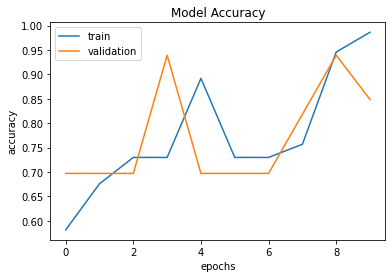

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

'yes'

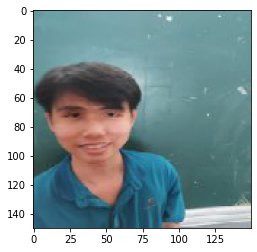

In [119]:
y_label = ['no','yes']
img = load_img('1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
y_label[np.argmax(Model.predict(img),axis = 1)[0]]